# ROC-Curve Demo
Empirical comparison of a few simple classifiers using the HMEQ data set. We compare the classifiers in terms of ROC Analysis 

In [2]:
# Import standard Python libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.model_selection import train_test_split

# Load credit risk data in pre-processed format from GitHub
data_url = 'https://raw.githubusercontent.com/Humboldt-WI/bads/master/data/hmeq_modeling.csv' 
df = pd.read_csv(data_url, index_col="index")

# Extract target variable and feature matrix 
X = df.drop(['BAD'], axis=1) 
y = df[['BAD']]

# Split data into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=888)
print("Shape of the data: ")
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

Shape of the data: 
(4172, 18) (4172, 1) (1788, 18) (1788, 1)



Model trained: LogisticRegression
The AUC on the test set of this model is: 0.8092

Model trained: DecisionTreeClassifier
The AUC on the test set of this model is: 0.8835

Model trained: KNeighborsClassifier
The AUC on the test set of this model is: 0.8918

Model trained: GaussianNB
The AUC on the test set of this model is: 0.7993


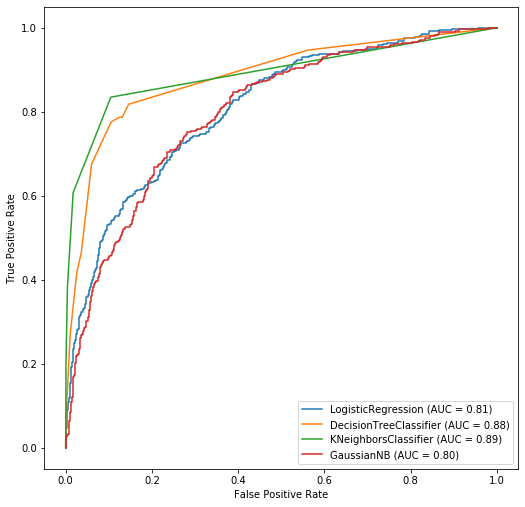

In [5]:
# Create sklearn objects for four simple classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

tree = DecisionTreeClassifier(criterion='gini', max_depth=5)
logit = LogisticRegression(penalty='none', fit_intercept=True)                    
nb = GaussianNB()
knn = KNeighborsClassifier()

# Create plot
fig, ax = plt.subplots()
fig.set_size_inches(8.5, 8.5)

# Create list of models for the loop
models = [logit, tree, knn, nb] 

# Loop to train and evaluate a model
for model in models: 
  print('\nModel trained: {}'.format(type(model).__name__))

  # Fit model using the training set
  model.fit(X_train, y_train.values.ravel()) 

  # Make prediction using the test set
  yhat = model.predict_proba(X_test)[:,1] 

  # Calcuate AUC score by using the prediction and y_test 
  print('The AUC on the test set of this model is: {:.4f}'.format(metrics.roc_auc_score(y_test, yhat))) 
  
  # Plot ROC curve
  metrics.plot_roc_curve(model, X_test, y_test, ax=ax ) 